<a href="https://colab.research.google.com/github/manavgupta1261/Machine-Learning/blob/main/2348529_Lab8ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score



In [ ]:
df = pd.read_csv("/content/emails.csv")

In [ ]:
df.head()


,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
df.isnull().sum()


text    0
spam    0
dtype: int64

In [ ]:
df.dtypes


text    object
spam     int64
dtype: object

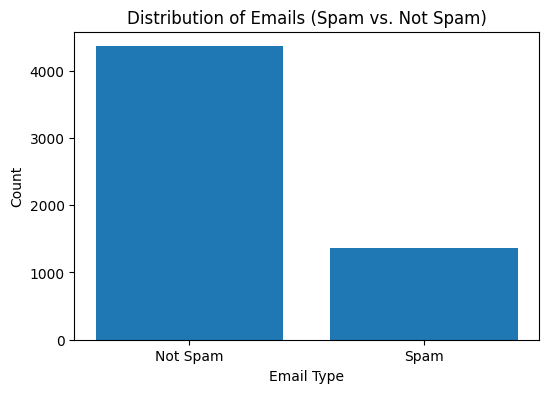

In [ ]:
spam_counts = df['spam'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(spam_counts.index, spam_counts.values)
plt.xticks(spam_counts.index, ['Not Spam', 'Spam'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Emails (Spam vs. Not Spam)')
plt.show()


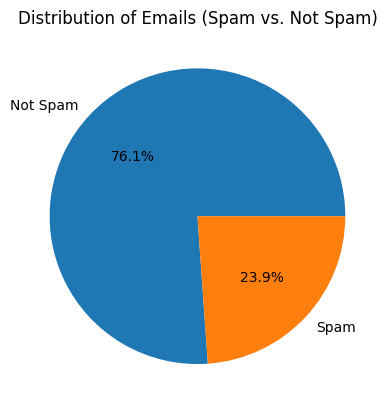

In [ ]:

spam_counts = df['spam'].value_counts()

plt.pie(spam_counts, labels=['Not Spam', 'Spam'], autopct='%1.1f%%')

plt.title('Distribution of Emails (Spam vs. Not Spam)')
plt.show()


In [ ]:
# Split the df into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['spam'], test_size=0.2, random_state=33)

# Vectorize the text df using TF-IDF
tfidf_vector = TfidfVectorizer(max_features=5000, stop_words='english')
X_tfidf_train = tfidf_vector.fit_transform(X_train)
X_tfidf_test = tfidf_vector.transform(X_test)


In [ ]:

# Initialize and train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_tfidf_train, y_train)
mnb_preds = mnb.predict(X_tfidf_test)

print("\nMultinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, mnb_preds))
print("Classification Report:\n", classification_report(y_test, mnb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, mnb_preds))


Multinomial Naive Bayes:
Accuracy: 0.9842931937172775
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       0.98      0.95      0.97       265

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[877   4]
 [ 14 251]]


In [ ]:
# Initialize and train the Multinomial Naive Bayes classifier with Laplace smoothing
mnb_with_smoothing = MultinomialNB(alpha=1.0)  # The alpha parameter controls the amount of smoothing (1.0 for Laplace)
mnb_with_smoothing.fit(X_tfidf_train, y_train)
mnb_with_smoothing_predictions = mnb_with_smoothing.predict(X_tfidf_test)

In [ ]:

# Evaluate the models with smoothing
print("Multinomial Naive Bayes with Laplace Smoothing:")
print("Accuracy:", accuracy_score(y_test, mnb_with_smoothing_predictions))
print("Classification Report:\n", classification_report(y_test, mnb_with_smoothing_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, mnb_with_smoothing_predictions))

Multinomial Naive Bayes with Laplace Smoothing:
Accuracy: 0.9842931937172775
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       0.98      0.95      0.97       265

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[877   4]
 [ 14 251]]


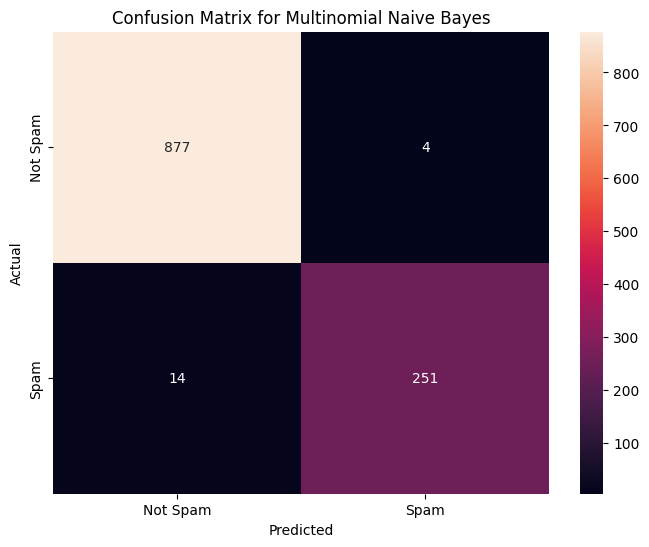

In [ ]:
# Compute the confusion matrix for Multinomial Naive Bayes predictions
conf_matrix = confusion_matrix(y_test, mnb_with_smoothing_predictions)

# Define class labels
class_labels = ["Not Spam", "Spam"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

Multinomial Naive Bayes - ROC AUC: 1.00
Threshold for Minimizing FPR: 0.2214


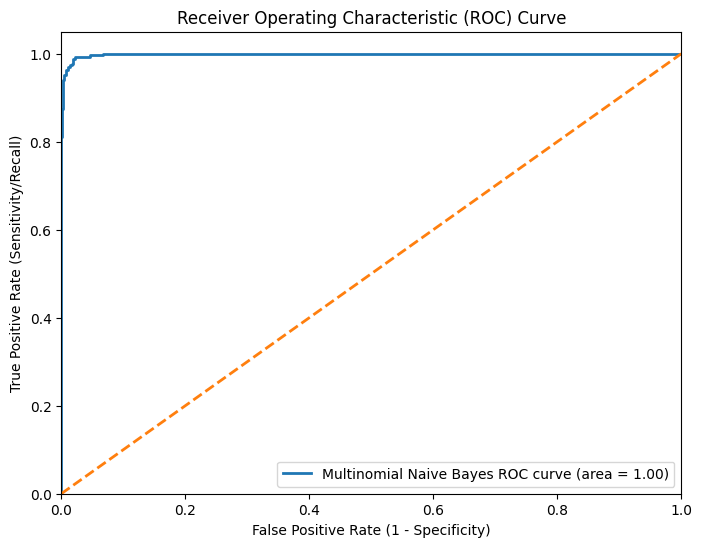

In [ ]:
# Generate probability predictions using predict_proba
mnb_prob_predictions = mnb_with_smoothing.predict_proba(X_test_tfidf)[:, 1]  # Use [:, 1] for the positive class

true_labels = y_test

# Compute ROC curve and ROC area (AUC) for Multinomial Naive Bayes
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(true_labels, mnb_prob_predictions)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# Calculate the Youden's J statistic for each threshold
youden_j = tpr_mnb - fpr_mnb
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds_mnb[optimal_threshold_index]

# Create the ROC curve plot for Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_mnb, tpr_mnb, lw=2, label='Multinomial Naive Bayes ROC curve (area = {:.2f})'.format(roc_auc_mnb))

# Show the ROC curve plot for Multinomial Naive Bayes
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Print ROC AUC value for Multinomial Naive Bayes
print('Multinomial Naive Bayes - ROC AUC: {:.2f}'.format(roc_auc_mnb))

# Print threshold that maximizes Youden's J statistic for Multinomial Naive Bayes
print('Threshold for Minimizing FPR: {:.4f}'.format(optimal_threshold))
plt.show()

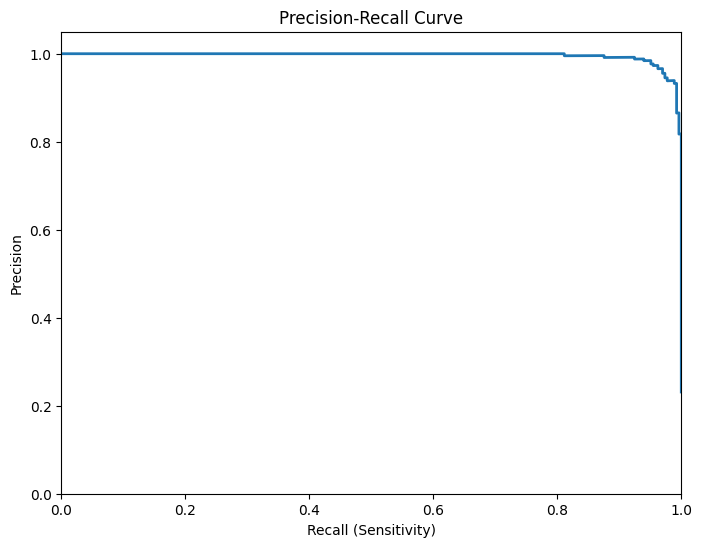

In [ ]:
# Generate probability predictions using predict_proba
mnb_prob_predictions = mnb_with_smoothing.predict_proba(X_test_tfidf)[:, 1]  # Use [:, 1] for the positive class

true_labels = y_test

# Calculate precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(true_labels, mnb_prob_predictions)

# Create the precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

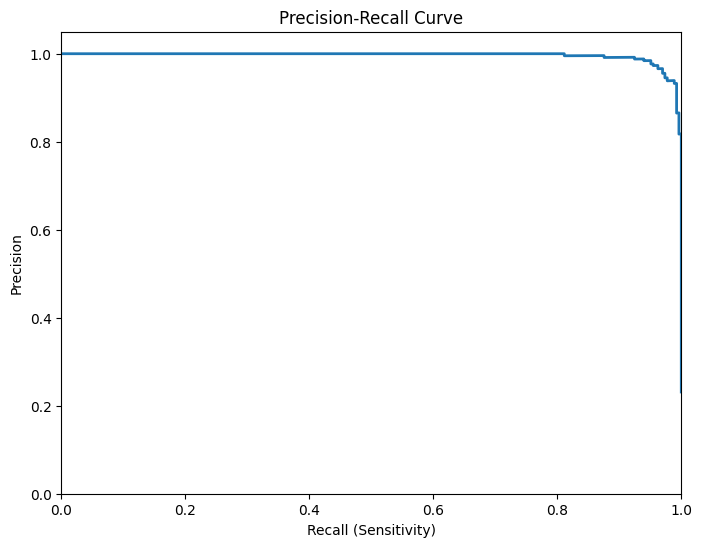

In [ ]:
# Generate probability predictions using predict_proba
mnb_prob_predictions = mnb_with_smoothing.predict_proba(X_test_tfidf)[:, 1]  # Use [:, 1] for the positive class

true_labels = y_test

# Calculate precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(true_labels, mnb_prob_predictions)

# Create the precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

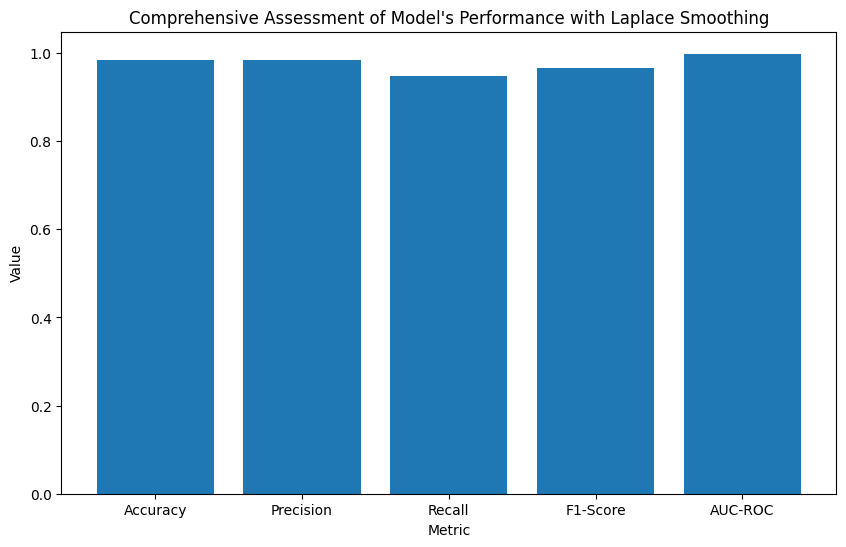

In [ ]:
accuracy = accuracy_score(y_test, mnb_with_smoothing_predictions)
precision = precision_score(y_test, mnb_with_smoothing_predictions)
recall = recall_score(y_test, mnb_with_smoothing_predictions)
f1 = f1_score(y_test, mnb_with_smoothing_predictions)
roc_auc = roc_auc_score(y_test, mnb_prob_predictions)

metrics_dict = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC-ROC": roc_auc,
}

# Extract metric names and values
metric_names = list(metrics_dict.keys())
metric_values = list(metrics_dict.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Comprehensive Assessment of Model\'s Performance with Laplace Smoothing')
plt.show()

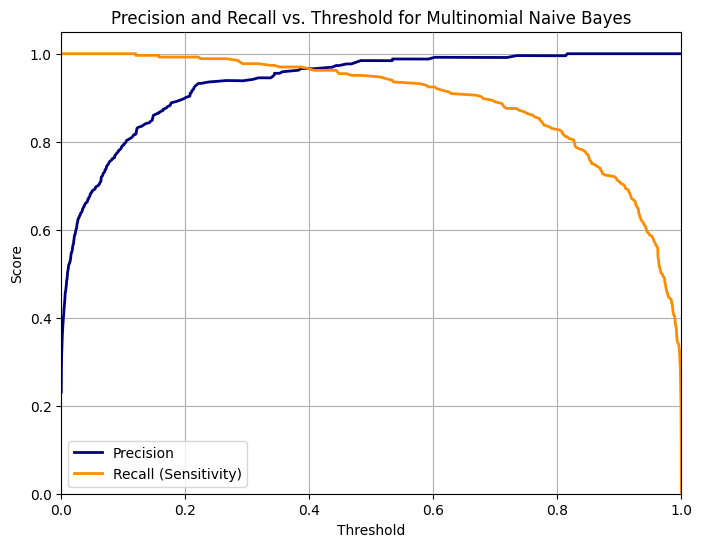

In [ ]:
fpr_mnb, tpr_mnb, thresholds_mnb

# Calculate precision at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, mnb_prob_predictions)

# Create a line graph to show precision vs. recall at different thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='navy', lw=2)
plt.plot(thresholds, recall[:-1], label='Recall (Sensitivity)', color='darkorange', lw=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold for Multinomial Naive Bayes')
plt.legend(loc='lower left')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.grid()
plt.show()